<a href="https://colab.research.google.com/github/yonandaputri/TA_GRNN/blob/master/GRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [466]:
#Import Library
from sklearn.datasets import load_boston
import numpy as np
import matplotlib
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


> **LOAD DATA**


In [467]:
import pandas as pd
df = pd.read_excel("https://github.com/yonandaputri/TA_GRNN/raw/master/realestate.xlsx")
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1




> **Normalisasi Data**



In [468]:
df = df.drop('No', axis = 1)
# df = df.drop('X5', axis = 1)
# df = df.drop('X6', axis = 1)
# df = df.drop('Y', axis = 1)
df = df.round({'X1': 3, 'X2': 1, 'X3': 3, 'X5': 3, 'X6': 3})
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.879,10,24.983,121.540,37.9
1,2012.917,19.5,306.595,9,24.980,121.540,42.2
2,2013.583,13.3,561.984,5,24.987,121.544,47.3
3,2013.500,13.3,561.984,5,24.987,121.544,54.8
4,2012.833,5.0,390.568,5,24.979,121.542,43.1


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [470]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885659,4.094203,24.969005,121.533384,37.980193
std,0.281967,11.392485,1262.109610,2.945562,0.012382,0.015348,13.606488
min,2012.667000,0.000000,23.383000,0.000000,24.932000,121.474000,7.600000
25%,2012.917000,9.025000,289.325000,1.000000,24.963000,121.528500,27.700000
50%,2013.167000,16.100000,492.231000,4.000000,24.971000,121.539000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977000,121.543000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.015000,121.566000,117.500000



> **PLOT 2D**


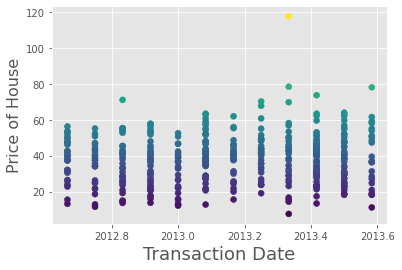

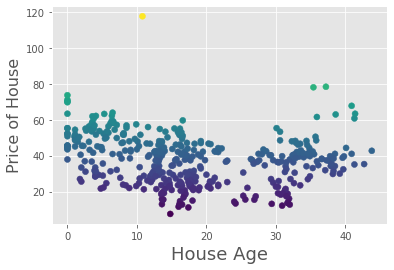

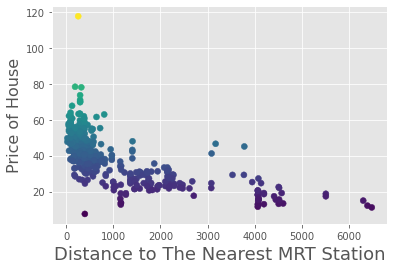

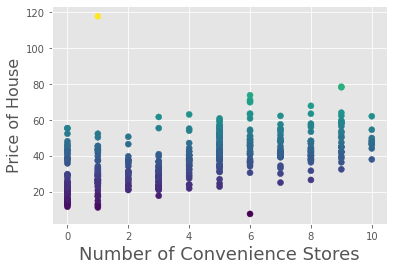

In [471]:
import matplotlib.pyplot as plt

td = df['X1']
ha = df['X2']
d = df['X3']
nc = df['X4']
harga = df['Y']


# PLOT Y = PRICE, X = TRANSACTION DATE
plt.scatter(td, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Transaction Date', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = HOUSE AGE
plt.scatter(ha, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('House Age', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = Distance to The Nearest MRT Station
plt.scatter(d, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Distance to The Nearest MRT Station', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


# PLOT Y = PRICE, X = Number of Convenience Stores in the Living Circle on Foot
plt.scatter(nc, harga, c=harga)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Number of Convenience Stores', fontsize=18)
plt.ylabel('Price of House', fontsize=16)
plt.show()


> **PLOT 3D**

Text(0.5, 0, 'Price of House')

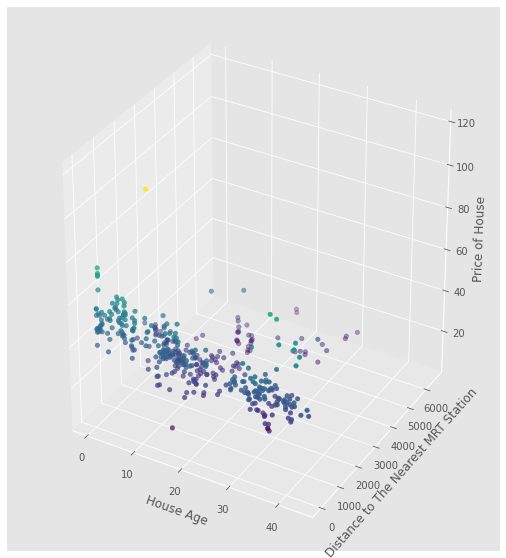

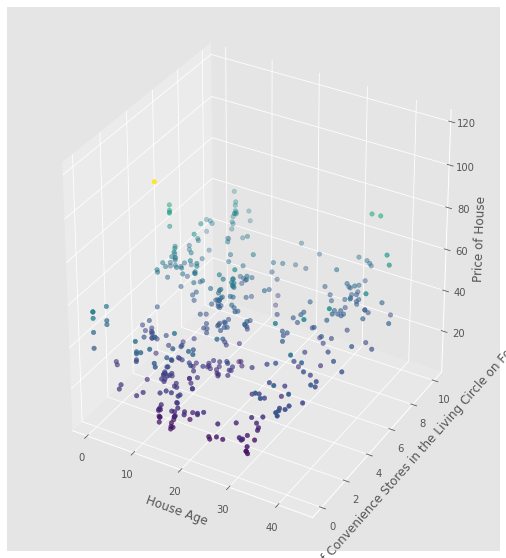

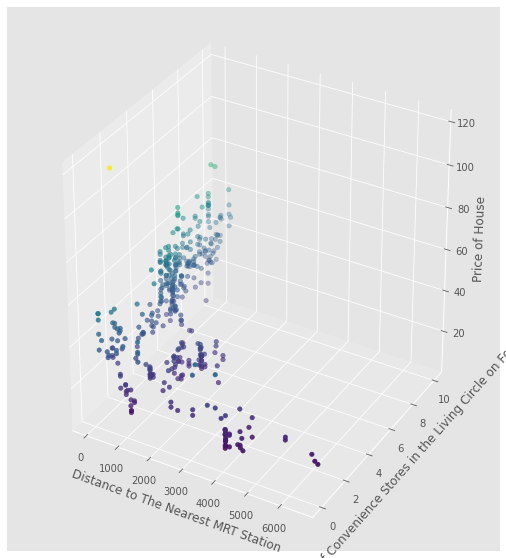

In [472]:
from mpl_toolkits.mplot3d import Axes3D



td = df['X1']
ha = df['X2']
d = df['X3']
nc = df['X4']
harga = df['Y']

# PLOT X = House Age, Y = Distance to The Nearest MRT Station, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(131, projection='3d')
ax.scatter(ha, d, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to The Nearest MRT Station')
ax.set_zlabel('Price of House')

# PLOT X = House Age, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(132, projection='3d')
ax.scatter(ha, nc, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

# PLOT X = Distance to The Nearest MRT Station, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(133, projection='3d')
ax.scatter(d, nc, harga, c=harga, marker='o')
ax.set_xlabel('Distance to The Nearest MRT Station')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

In [473]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.034161,-0.039702,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054786,-0.048932,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.589773,-0.806285,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.440601,0.448191,0.571005
X5,0.034161,0.054786,-0.589773,0.440601,1.000000,0.412910,0.544333
X6,-0.039702,-0.048932,-0.806285,0.448191,0.412910,1.000000,0.522907
Y,0.087491,-0.210567,-0.673613,0.571005,0.544333,0.522907,1.000000


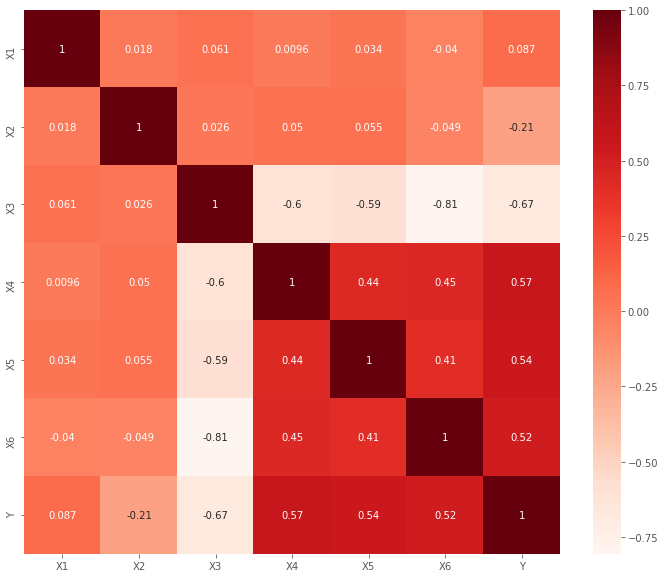

In [474]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [475]:
#Correlation with output variable
cor_target = abs(cor["Y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

X3    0.673613
X4    0.571005
X5    0.544333
X6    0.522907
Y     1.000000
Name: Y, dtype: float64

In [476]:
print(df[["X3","X4"]].corr())
print(df[["X3","X5"]].corr())
print(df[["X3","X6"]].corr())
print(df[["X4","X5"]].corr())
print(df[["X4","X6"]].corr())
print(df[["X5","X6"]].corr())

          X3        X4
X3  1.000000 -0.602519
X4 -0.602519  1.000000
          X3        X5
X3  1.000000 -0.589773
X5 -0.589773  1.000000
          X3        X6
X3  1.000000 -0.806285
X6 -0.806285  1.000000
          X4        X5
X4  1.000000  0.440601
X5  0.440601  1.000000
          X4        X6
X4  1.000000  0.448191
X6  0.448191  1.000000
         X5       X6
X5  1.00000  0.41291
X6  0.41291  1.00000


In [477]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# X = df[['X3', 'X4', 'X5', 'X6']].values
X = df.iloc[:, 0:6]
Y = df[['Y']].values

# x_train, x_test, y_train, y_test = train_test_split(
#     preprocessing.minmax_scale(X),
#     preprocessing.minmax_scale(Y),
#     test_size=0.3,
# )

x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(X),
    preprocessing.minmax_scale(Y.reshape(-1,1)),
    test_size=0.2,
)


# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# y_test

In [478]:
df = df['Y']
df.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y, dtype: float64

In [479]:
y_test.shape

(83, 1)

In [480]:
!pip install neupy

In [481]:
from neupy import algorithms

regression = algorithms.GRNN(std=0.1, verbose = False)
regression.fit(x_train, y_train)
regression

GRNN(verbose=False, std=0.1)

In [482]:
y_predicted = regression.predict(x_test)
# y_predicted

In [483]:
# df = df.round({'X1': 3, 'X2': 1, 'X3': 1})

df = pd.DataFrame({'Actual' : y_test[:, 0],'Predicted': y_predicted[:, 0]})
df.head(3)

,Actual,Predicted
0,0.163785,0.158218
1,0.190173,0.218478
2,0.458599,0.447520


In [484]:
import numpy as np
mse = np.mean((y_predicted - y_test) ** 2)
mse

0.00533626288671311

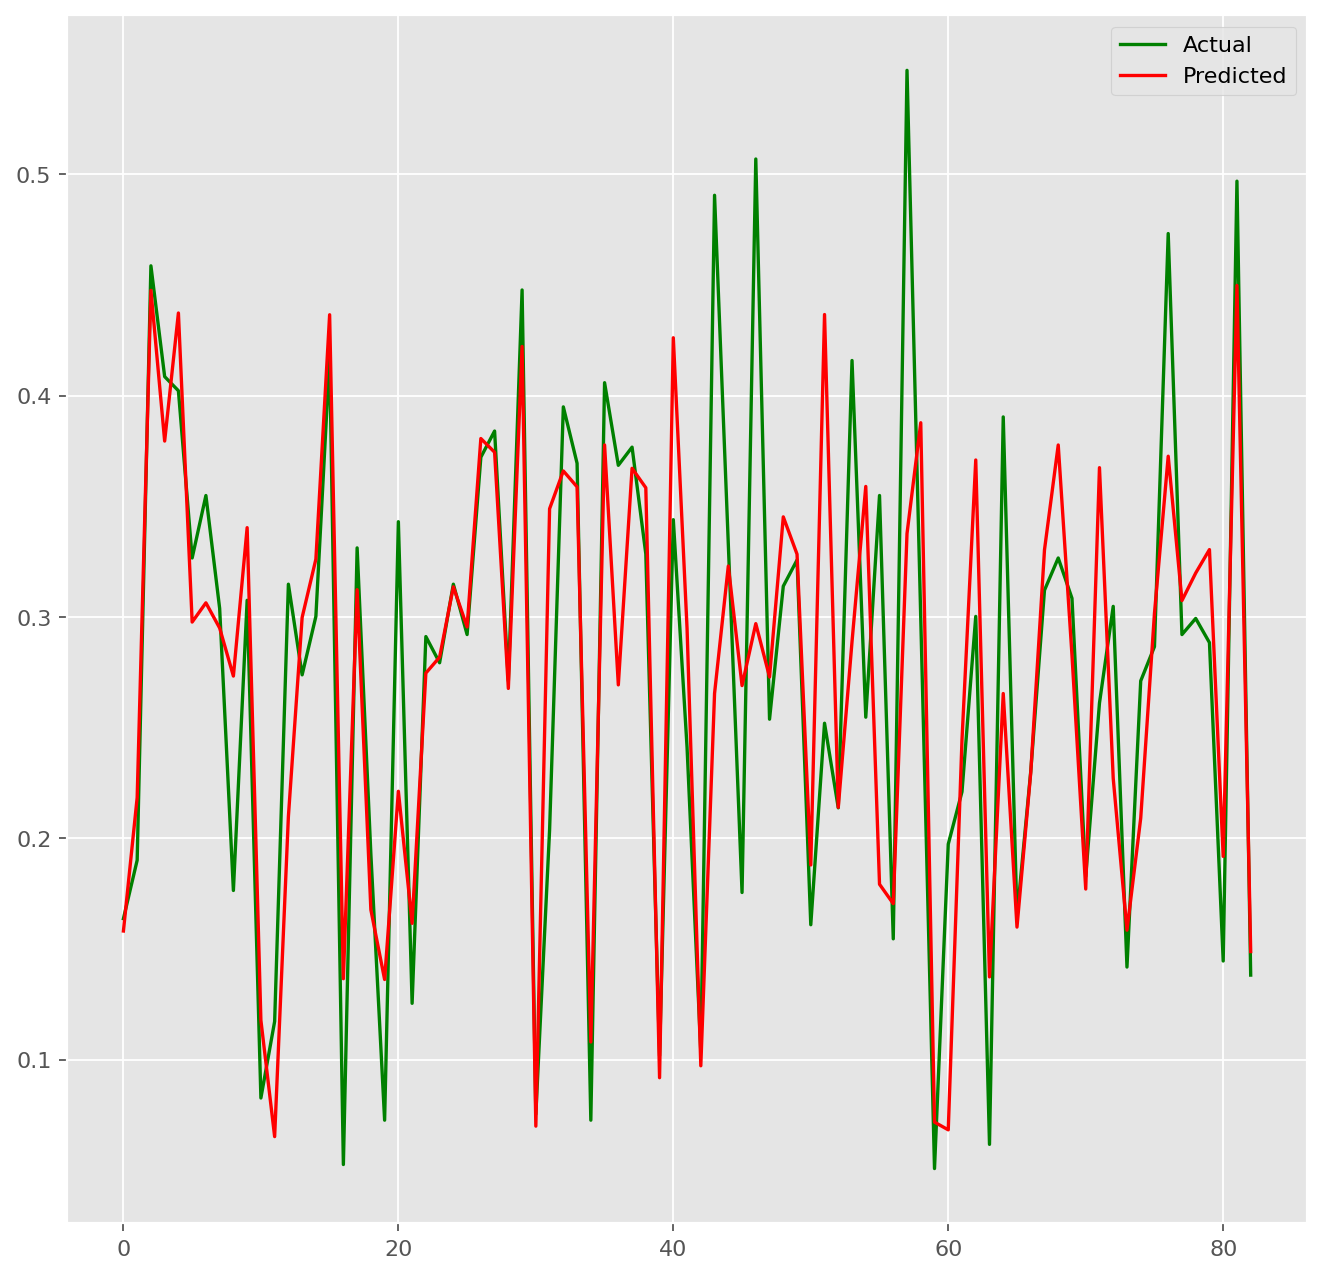

In [485]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(num=None, figsize=(10, 10), dpi=160, facecolor='w', edgecolor='w')

plt.style.use('ggplot')
plt.plot(df['Actual'], 'g', label = 'Actual')
plt.plot(df['Predicted'], 'r', label = 'Predicted')

plt.legend()
plt.show()

In [486]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.050437544348185606
Mean Squared Error: 0.00533626288671311
Root Mean Squared Error: 0.07304972886132508
